# Módulo 4. Redes convolucionales

¡Bienvenidos al cuarto módulo! Tras haber visto en el módulo anterior las diferentes implementaciones de Gradient Descent, las funciones de activación y de pérdidas y la inicialización de pesos, comenzamos hoy con las redes neuronales convolucionales, ¡el buque insignia del deep learning!

Como se puede observar del módulo de anterior, el perceptrón multicapa utilizado permite resolver con satisfacción la tarea de clasificación propuesta. Para problemas de cierta dificultad, este tipo de arquitectura no ofrece una solución óptima en la mayoría de escenarios reales. Por este motivo se propusieron las **redes neuronales convolucionales**. Dichas arquitecturas de red **extraen la información relevante automáticamente** de la imagen por medio de la operación convolución de manera local (en la práctica dicha operación es la correlación cruzada).


## 1. Introducción a las Redes Neuronales Convolucionales

En las sesiones anteriores, hemos visto que una red neuronal es basicamente un aproximador de funciones universal, ¿lo recordáis? Lo que quiere decir es que en esencia, lo que hacemos con las redes neuronales es solucionar problemas tratando de encontrar la mejor aproximación posible a una función que permite solucionar nuestro problema.

Para ello, disponemos de una serie de parámetros (los pesos y la bias) que vamos actualizando haciendo uso del algoritmo de backpropagation, que está basado en el gradient descent.

Gracias a nuestras etiquetas, somos capaces de calcular el error en cada iteración y modificar los pesos para reducirlo progresivamente.

Vale, genial. ¿Y qué es una red neuronal **convolucional**? O lo que es más importante, **¿qué problemas permite solucionar?**

Pues básicamente, **todos los que se puedan expresar en forma de imagen**.


Por ejemplo, supongo que la mayoría de vosotros tendréis FaceBook o lo conoceréis, os habéis fijado en que cuando vais a etiquetar a alguien os sugiere personas? Y que normalmente, acierta => **convnets al poder!**

<img src="https://image.ibb.co/kROQSd/fb_label_face.png" alt="fb_label_face" border="0" height="350">

O los que tengáis un iPhone (no sé si con Android será igual), habéis visto la carpeta "Personas" dentro de la galería? WTF!!! cómo hacen eso? son capaces de encontrar la cara en una imagen, y no contentos con eso, también son capaces de agrupar todas las caras que pertenecen a una determinada persona!! Pues, ¿sabéis qué?? => **convnets al poder!**

<img src="https://image.ibb.co/dOY3DJ/ip_face_recog.png" alt="ip_face_recog" border="0" height="350">

O quizás hayáis oído hablar de los coches autónomos, que son capaces de "leer" las señales de tráfico, incluso detectar si hay una persona cruzando la calle. ¿A que no lo adivináis? => **convnets al poder!**

<img src="https://image.ibb.co/e9cify/self_driving_cars_detection.jpg" alt="self_driving_cars_detection" border="0" height="350">

Y estos, son solo algunos ejemplos con los que tratáis día a día, pero existen muchos más.

De hecho, las *CNN* están muy de moda para resolver problemas de imagen médica. Esto se debe a una característica que tienen las CNNs y que las hacen perfectas para este cometido (y otros muchos). Esta característica es que son capaces, por sí solas, de encontrar las características adecuadas para posteriormente clasificar las imágenes correctamente.

Cualquiera de vosotros que le guste un poco el tema y haya mirado sabrá que dentro del ámbito de la visión por computador el deep learning ha supuesto un antes y un después, y si no os lo creéis, mirad esta imagen:

<img src="https://image.ibb.co/k48yfy/imagenet_cv_vs_dl.jpg" alt="imagenet_cv_vs_dl" border="0">

Vale, estupendo. Pero **¿qué es exactamente una CNN**?

Pues es una red neuronal en la que se introducen nuevos tipos de capas, donde la más importante es **la convolucional**.

**Y, ¿qué es la convolución?**

¡¡Vamos a verlo!!

## 2. La convolución

Estrictamente, la convolución se utiliza sobretodo en tratamiento de señal, y es una operación matemática que permite combinar dos señales. En tratamiento digital de la señal, se emplea para conocer qué le va a pasar a una señal después de "pasar" por un determinado dispositivo. Por ejemplo, para saber cómo cambia nuestra voz tras haber pasado por el micrófono de nuestro móvil, podríamos calcular la convolucion de nuestra voz con la respuesta al impulso del micrófono.

Si sentís curiosidad, aquí tenéis un muy buen recurso: http://includeblogh.blogspot.com.es/2010/12/convolucion-pero-si-es-muy-facil-parte.html

Fuera de lo estrictamente técnico, las redes neuronales convolucionales se han hecho *famosas* gracias a su capacidad para detectar patrones que después clasifican. Pues bien, esos **detectores de patrones son las convoluciones**.

Vamos a ver cómo entiende un ordenador una imagen:

<img src="https://image.ibb.co/eXT60y/img_rep.png" alt="img_rep" border="0" width="400">
<img src="https://image.ibb.co/dG5m0y/img_rep_2.png" alt="img_rep_2" border="0" width="600">

Como podéis ver, una imagen en color se representa como una matriz de 3 dimensiones: **Ancho** x **Alto** x **Canales**. Existen varias formas de representar las imágenes, pero la más común es usando el espacio de colores RGB. Estgo quiere decir que un ordenador al final ve 3 matrices de Ancho x Alto, donde la primera le indica las cantidades de rojo que tiene la imagen, la segunda, de verde, y la tercera, de azul.

Si la imagen fuese en escala de grises, el ordenador la vería como una sola matriz bidimensional de Ancho x Alto.

Por último, los valores que pueden tomar los elementos de la matriz dependen del tipo de variable utilizada. Las más comunes son:

* si usamos enteros de 8 bits: pueden ir de 0 a 255
* si usamos floats: de 0 a 1

Me interesa que entendáis muy bien esto, así que si hay alguna duda podéis decirmelo ahora o al acabar la clase, pero no os quedéis con ella!


Pues bien, sabiendo que la imagen es una matriz, lo que hace la convolución es definir un **filtro** o **kernel** por el que va a multiplicar a la matriz de la imagen. Fijaos en la siguiente imagen:

<img src="https://image.ibb.co/czOQSd/convolution_kernel.png" alt="convolution_kernel" border="0">

Se define un kernel, de 3x3 pixels, y se multiplica a la input_image. ¿Qué es lo que pasa? Que el kernel es mucho más pequeño que la imagen, por lo que para poder multiplicar a toda la imagen, primero situamos el kernel sobre los primeros 3x3 pixels, luego lo movemos uno hacia la derecha, luego otro, luego otro... y vamos calculando **la suma de la multiplicación de cada elemento del kernel por cada pixel correspondiente de la imagen**. El resultado de esta operación se almacena en la imagen de salida, como podéis observar.

Aquí podéis verlo más claro:

<img src="https://image.ibb.co/e0GSqy/convolution.png" alt="convolution" border="0">

Y ahora con un ejemplo animado para que veáis el proceso:

<img src="https://image.ibb.co/eqGy0y/cnn_stride1.gif" alt="cnn_stride1" border="0">

<!--
Y por último, un ejemplo con una imagen en color, es decir, que tiene 3 canales, R, G y B, con lo cual, tiene 3 matrices bidimensionales, una para cada canal. En este caso, como podéis ver, la convolución se aplica a cada canal por separado y así se obtiene como resultado una matriz de 3 dimensiones, con el resultado de la convolución para cada canal.

**En el caso de las capas convolucionales, los resultados de los diferentes canales se suman**, además de la bias, con lo que el resultado es una imagen de un solo canal (una matriz bidimensional):

<img src="https://image.ibb.co/bHU4Ly/convolution_rgb.gif" alt="convolution_rgb" border="0">

En este enlace podéis verlo más en detalle: http://cs231n.github.io/assets/conv-demo/index.html
-->

Vale, ya sabéis la teoría, pero os he dicho que son detectores de patrones y de momento con esto no estamos detectando nada, simplemente multiplicando y sumando cosas, ¿no?

Vamos a ver unos ejemplos a ver qué es lo que pasa cuando hacemos estas mutiplicaciones y sumas ;-)

In [ ]:
# Hacemos los imports necesarios
import numpy as np
import tensorflow as tf
from scipy import signal
from scipy import misc
import cv2
import matplotlib.pyplot as plt

/tmp/ipython-input-2801413704.py:5: DeprecationWarning: scipy.misc is deprecated and will be removed in 2.0.0
  from scipy import misc


In [ ]:
image = cv2.imread("image.jpg")

In [ ]:
image = cv2.resize(image, None, fx=0.1, fy=0.1) #

In [ ]:
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) #para convertir la imagen en gris

In [ ]:
image.shape #imagen de 2 dimensiones

(259, 194)

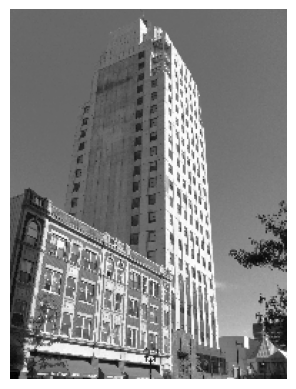

In [ ]:
plt.imshow(image,cmap="gray") #para colorearla en gris
plt.axis("off")
plt.show()

In [ ]:
kernel =np.array([[-1,3,1],[-1,3,1],[-1,3,1]],dtype=np.float32) #kernel tipo Right Sobel (resaltar bordes de dcha)

In [ ]:
grad = signal.convolve2d(image,kernel,mode='same',boundary='symm') # kernel de 2D. la img de salida = a la de entrada, limites todos simetricos a los q hay

In [ ]:
import matplotlib.pyplot as plt

# función para mostrar dos imágenes juntas
def plot_two(img_orig, img_conv):
  fig, (ax_orig, ax_mag) = plt.subplots(1, 2, figsize=(10, 25))
  ax_orig.imshow(img_orig, cmap='gray')
  ax_orig.set_title('Original')
  ax_orig.set_axis_off()
  ax_mag.imshow((img_conv), cmap='gray')
  ax_mag.set_title('Gradiente')
  ax_mag.set_axis_off()

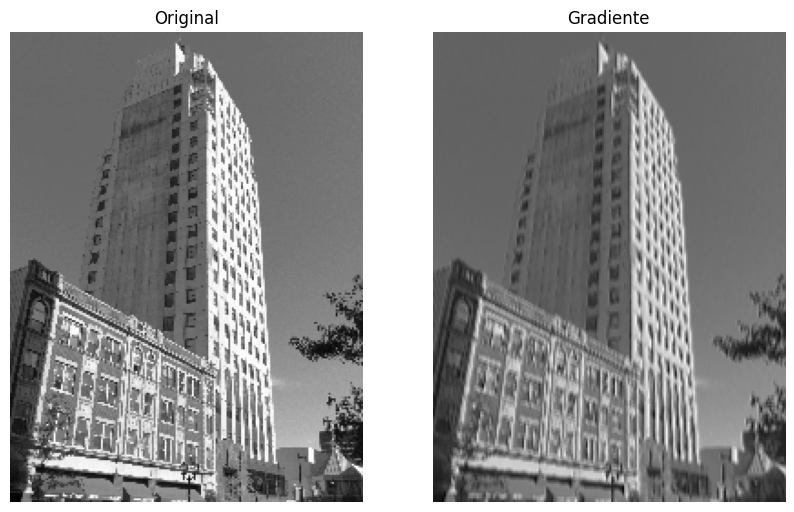

In [ ]:
plot_two(image,grad)

In [ ]:
image = cv2.imread("image.jpg") #rescato la imagen original para hacerlo en color RGB

In [ ]:
image = cv2.resize(image, None, fx=0.1, fy=0.1) #

In [ ]:
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) #para convertir la imagen en color

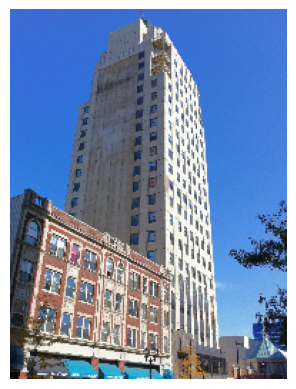

In [ ]:
plt.imshow(image,cmap="gray") #para colorearla en gris
plt.axis("off")
plt.show()

In [ ]:
ks_w = 7
ks_h = 7
kernel = np.ones((ks_w, ks_h), dtype=np.float32) / (ks_w * ks_h)

In [ ]:
grad_r = signal.convolve2d(image[:, :, 0], kernel, mode='same', boundary='symm')
grad_g = signal.convolve2d(image[:, :, 1], kernel, mode='same', boundary='symm')
grad_b = signal.convolve2d(image[:, :, 2], kernel, mode='same', boundary='symm')

In [ ]:
grad_r.shape

(259, 194)

In [ ]:
reconstructed_color = np.concat([np.uint8(grad_r[:, :, np.newaxis]), np.uint8(grad_g[:, :, np.newaxis]), np.uint8(grad_b[:, :, np.newaxis])], axis=-1) #juntamos la imagen en una

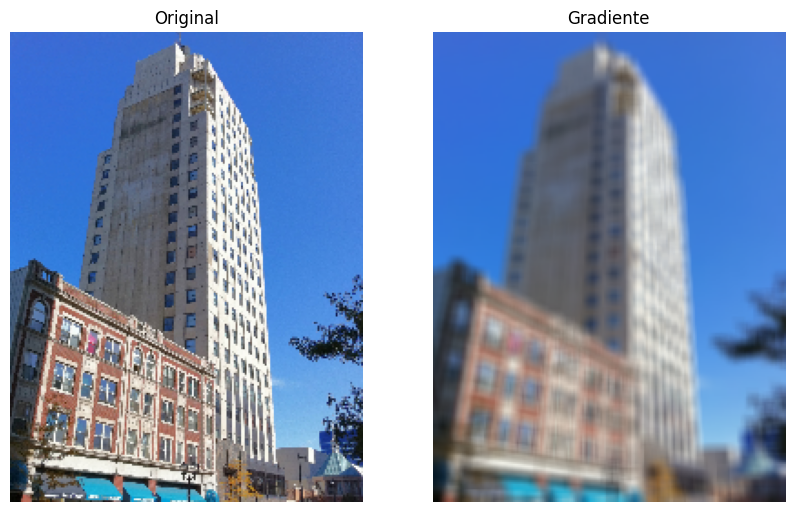

In [ ]:
plot_two(image, reconstructed_color)

¿Cómo lo véis? Parece que estamos detectando algunos bordes, ¿verdad? Y qué son los bordes, sino líneas? Vaya! Parece que tenemos un detector de líneas verticales!! ;-)

¿Cómo podríamos conseguir uno de líneas horizontales?

In [ ]:
kernel = ## Code ##
grad_v = ## Code ##
plot_two(ascent, grad_v)

In [ ]:
kernel = ## Code ##
grad_v = ## Code ##
plot_two(ascent, grad_v)

**Estos son algunos de los kernels más utilizados en CV tradicional:**

<img src="https://image.ibb.co/jcgw0y/kernels.png" alt="kernels" border="0">

Vamos a ver los ejemplos nosotros mismos:

In [ ]:
# Cargamos y mostramos la imagen original
url_img = 'https://upload.wikimedia.org/wikipedia/commons/5/50/Vd-Orig.png'
from urllib.request import urlopen
from io import BytesIO
from PIL import Image
file = ## Code ##
img = ## Code ##
plt.imshow(img)
plt.axis('off')

In [ ]:
def convolve3d(img, kernel):
  img_out = np.zeros(img.shape)
  for i in range(img.shape[-1]):
     img_out[:,:,i] = ## Code ##
  return img_out.astype('uint8')


In [ ]:
# Probamos con el kernel identidad
kernel = ## Code ##
img_ki = convolve3d(img, kernel)
plot_two(img, img_ki)

Más ejemplos: http://aishack.in/tutorials/image-convolution-examples/

Vale, muy guays estas transformaciones, pero...

## ¿Cómo es capaz la convolución de detectar un determinado patrón?

<!-- https://adeshpande3.github.io/adeshpande3.github.io/A-Beginner's-Guide-To-Understanding-Convolutional-Neural-Networks/ -->

### Ejemplo detección patrones

**Nuestro filtro:**

<img src="https://image.ibb.co/iMo97d/conv_patt_det_1.png" alt="conv_patt_det_1" border="0">

**Nuestra imagen:**

<img src="https://image.ibb.co/jNkYYJ/conv_patt_det_2.png" alt="conv_patt_det_2" border="0">

**¿Qué pasa si nuestro filtro cae en la "espalda" de la rata?**

<img src="https://image.ibb.co/nugJ0y/conv_patt_det_3.png" alt="conv_patt_det_3" border="0">

$Resultado = 30·0 + 30·50 + 30·20 + 30·50 + 30·50 + 30·50=6600$ es un número muy alto!!

**¿Qué pasa si nuestro filtro cae en la "cabeza" de la rata?**

<img src="https://image.ibb.co/hmp5fy/conv_patt_det_4.png" alt="conv_patt_det_4" border="0">

$Resultado = 30·0 + 30·0 + 30·0 + 30·0 + 30·0 + 30·0=0$ es un número muy bajo!! ¡No existe respuesta para este receptive field!


### Así es como la convolución es capaz de detectar patrones.

## 3. Redes neuronales convolucionales y principales capas

Ahora que ya sabéis lo que es la convolución, vamos a ver qué son las redes neuronales convolucionales y cómo funcionan.

<img src="https://image.ibb.co/kXj0cd/cnn_feat_class.jpg" alt="cnn_feat_class" border="0">
<img src="https://image.ibb.co/fKGU7d/cnn_intro.png" alt="cnn_intro" border="0">

En estas imagenes podéis ver la **arquitectura típica de una red neuronal convolucional**.

Como entrada, tenemos la imagen que queremos clasificar, en este caso, de nuestro gato negro. Como ya sabéis, esto no es otra cosa que una matriz de Ancho x Alto x 3 (porque es RGB).

Después, empiezan los "bloques convolucionales". Estos bloques están compuestos normalmente por:

* Capas **convolucionales**, que ya hemos visto como funcionan
* Capas de **pooling**, que lo que hacen es *diezmar* el contenido de la salida de la capa convolucional

Antes hemos visto como funciona la convolución: definimos un kernel o filtro que sirve para resaltar determinadas estructuras de la imagen. Y os estaréis preguntando: ¿cómo defino yo un filtro que me permita averiguar qué la imagen de entrada tiene un gato negro?

Pues aquí está la **magia** de las CNNs!! Nosotros **no tenemos que definir ningún filtro, los aprende la red automáticamente gracias al backpopagation!!**

Por otra parte, ¿os dáis cuenta de que nuestra **CNN tiene dos etapas**: **feature extractor** y **classifier**? Esto se debe a que la red, primero extrae unos determinados patrones haciendo uso de la primera etapa (base model), que son los que mejor le vienen al posterior clasificador (top model) para hacer su trabajo con la mayor precisión posible.

La etapa de **feature extraction** va de menos a más, es decir, las primeras capas convolucionales detectan lineas en diferentes orientaciones, las siguientes detectan ya formas y colores, las siguientes patrones más complejos, etc. Fijaos en estas imágenes:

<img src="https://image.ibb.co/dz5DFy/vis_cnn_layer2.png" alt="vis_cnn_layer2" border="0" height="300">

<img src="https://image.ibb.co/kQ4UoJ/vis_cnn_layer3.png" alt="vis_cnn_layer3" border="0" height="300">

<img src="https://image.ibb.co/n69Jhd/vis_cnn_layer4.png" alt="vis_cnn_layer4" border="0">


**Así que al final, lo que tenemos, es una red que aprende sola, con la que no hace falta que nos preocupemos de qué características escogemos para clasificar, ya que las elige ella sola.**

¿Y cómo va aprendiendo? De la misma forma que una red neuronal tradicional.

<img src="https://image.ibb.co/fYyhqy/cnn_learning.png" alt="cnn_learning" border="0">

De hecho, la segunda etapa, la de clasificador, está compuesta por capas **densas**, que si recordáis lo que dijimos anteriormente, son las capas que se usan en las redes neuronales tradicionales. Por lo que finalmente podría entenderse una CNN como un conjunto de etapas convolucionales acopladas a una red neuronal tradicional, que es la que clasifica los patrones extraídos por las convoluciones y devuelve unas probabilidades para cada clase.

A continuación, vamos a estudiar los tipos de capas más comunes en una CNN:



*   **Convoluciones**




Estas capas son las encargadas de aplicar la convolución a nuestras imágenes de entrada para encontrar los patrones que más tarde permitirán clasificarla.

Para ello, se define:

1.   El número de filtros/kernels a aplicar a la imagen: el número de   matrices por las que se van a convolucionar las imágenes de entrada
2.   El tamaño de estos filtros: 99% de las veces son cuadrados, de 3x3, 5x5, etc.

Aquí podéis ver el esquema general, en el que se ve como una imagen de entrada dada se convoluciona por cada filtro, y la salida son mapas de activación 2D. Esto quiere decir que si la imagen de entrada es RGB, tendrá 3 canales. Por lo tanto, convolucionaremos cada filtro por cada canal, y luego sumaremos los resultados, para reducir de 3 canales a 1 solo.

<img src="https://image.ibb.co/bXBQTJ/conv_layer_1.png" alt="conv_layer_1" border="0">

En este demo podéis ver lo que os acabo de explicar:

<img src="https://image.ibb.co/bHU4Ly/convolution_rgb.gif" alt="convolution_rgb" border="0">

Como la entrada tiene 3 canales, R, G y B, esto significa que nuestra imagen de entrada viene definida como 3 matrices bidimensionales, una para cada canal. Así que lo que hace la capa convolucional es aplicar la convolución por separado a cada canal, obtiene el resultado de cada canal, y luego los suma para obtener una única matriz 2D que es llamada mapa de activaciones.

En este enlace podéis verlo más en detalle: http://cs231n.github.io/assets/conv-demo/index.html

Ahora imaginaos que nuestra capa tiene 4 filtros:

<img src="https://image.ibb.co/nb0DYJ/conv_layer_2.png" alt="conv_layer_2" border="0">

Además del número de filtros y el tamaño, las capas convolucionales tiene otro parámetro importante: **el stride**.

Fijaos en el cambio:

<img src="https://image.ibb.co/eqGy0y/cnn_stride1.gif" alt="cnn_stride1" border="0" height="250">
<img src="https://image.ibb.co/cXL2Sd/cnn_stride2.gif" alt="cnn_stride2" border="0" height="250">

Por último, es **importante** que conozcáis el concepto de **receptive field**.

<img src="https://image.ibb.co/cAYgnd/recept_field.jpg" alt="recept_field" border="0">
<img src="https://image.ibb.co/cFsfDJ/receptive_field.png" alt="receptive_field" border="0">

En el caso de las capas convolucionales, las neuronas de la salida se hallan conectadas solo a una región local de la imagen de entrada. Así que, en este ejemplo, el campo receptivo es de 5x5x3, porque el kernel es de 5x5x3 (la imagen es RGB). Se puede entender como "lo que ve" la red.

Con las capas densas ocurre lo contrario, todas las neuronas se hayan conectadas con todos los elementos anteriores. Sin embargo, las neuronas siguen funcionando exactamente igual, lo único es que en la entrada "ven" la imagen completa, en vez de una región de la misma.

MÁS INFO: http://cs231n.github.io/convolutional-networks/#layers

**Por tanto, los parámetros que vamos a tener que ajustar en una capa convolucional son: tamaño del kernel, stride y número de filtros.**

* **Capas de Pooling**

Las capas de pooling se utilizan para ir reduciendo el tamaño de nuestros mapas de activaciones, ya que de otra forma no sería posible ejecutarlos en GPUs. Además, también ayuda a reducir el overfitting.

Los dos tipos de pooling más comunes son:
* max-pooling: calcula el máximo de los elementos
* averag-pooling: calcula la media de los elementos

Hay que tener en cuenta que esto se realiza para cada mapa de activaciones de nuestro volumen, es decir, no interviene para nada la dimensión depth en los cálculos.

Veamos un ejemplo de un max-pooling con diferentes strides:

<img src="https://image.ibb.co/b6tTYJ/cnn_pooling.png" alt="cnn_pooling" border="0">


* **Capas de Normalización**

Realizan operaciones sobre los mapas de activaciones. La más común es la de BatchNormalization, que veremos más adelante.


* **Fully-connected o densas**

Las de siempre.

Por cierto, mirad la imagen a continuación: las capas que más parámetros tienen son las densas!!! Tiene sentido, ¿verdad? En ellas, todas las neuronas se interconnectan con todas las de la siguiente capa.

<img src="https://image.ibb.co/jbCaxd/comparison_weight_sharing.png" alt="comparison_weight_sharing" border="0">



Después de tanta explicación, ¡¡vamos a por nuestra primera red convolucional!!!

### Ejemplo 1

**Vamos a implementar una red que permita diferenciar entre 10 tipos de objetos**. Para ello, emplearemos el dataset CIFAR-10, que consta de 60.000 imágenes en color, de 32x32 píxels, repartidas en las 10 clases que podéis apreciar a continuación. El dataset está dividido en 50.000 imágenes para entrenamiento y 10.000 para test.

<img src="https://image.ibb.co/dnFmKf/cifar10.png" alt="cifar10" border="0" width="400">

Como hemos visto al principio de esta sesión, para esta implementación no vamos a utilizar TensorFlow, sino Keras. A partir de ahora, utilizaremos la versión de Tensorflow que viene por defecto en Google Colab.

In [1]:
import numpy as np
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, GlobalMaxPool2D, BatchNormalization, Activation, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.regularizers import l2

In [ ]:
np.random.seed(42)

# Cargamos el dataset
(X_train, Y_train), (X_test, Y_test) = cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


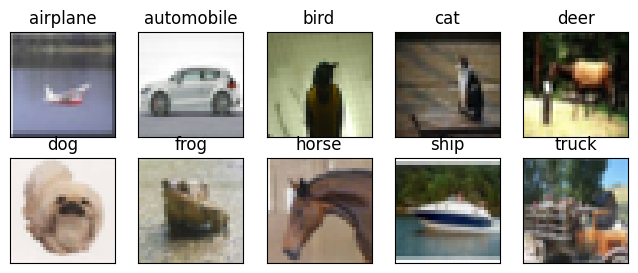

In [ ]:
# Vamos a ver algunas imágenes de cada clase
import matplotlib.pyplot as plt
class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']
fig = plt.figure(figsize=(8,3))
for i in range(len(class_names)):
  ax = fig.add_subplot(2, 5, 1 + i, xticks=[], yticks=[])
  idx = np.where(Y_train[:]==i)[0]
  features_idx = X_train[idx,::]
  img_num = np.random.randint(features_idx.shape[0])
  im = features_idx[img_num,::]
  ax.set_title(class_names[i])
  #im = np.transpose(features_idx[img_num,::], (1, 2, 0))
  plt.imshow(im)
plt.show()

In [ ]:
X_train.shape

(50000, 32, 32, 3)

In [ ]:
X_train = X_train.astype("float32") /255. #normalizamos
X_test = X_test.astype("float32") / 255.

In [ ]:
X_train[0].max()

np.float32(1.0)

In [ ]:
Y_train =to_categorical(Y_train, num_classes=10) #pasar a vector de categorias de 10 etiquetas
Y_test= to_categorical(Y_test, num_classes=10)

In [ ]:
Y_train.shape

(50000, 10)

In [ ]:
Y_train[0]

array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.])

### RED CNN BASICA 71% acc -> 2M param

In [ ]:
# Basica 71% acc -> 2M param:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation="relu", input_shape=(32,32,3))) #32 canales. tamaño kernel. Tamaño de entrada. Si fuera video3D, audio1D
model.add(MaxPooling2D(pool_size=(2, 2))) #tamaño de la ventana
model.add(Conv2D(64, kernel_size=(3, 3), activation="relu")) #2ªcapa, doble de canales 64 porque hay más profundidad
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, kernel_size=(3, 3), activation="relu"))#3ªcapa
model.add(Flatten())
model.add(Dense(1024, activation="relu"))
model.add(Dense(10, activation="softmax")) #última capa para pasar a probabilidades


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_7 (Conv2D)               │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 4, 4, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1024)           │     2,098,176 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │        10,250 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,201,674 (8.40 MB)

 Trainable params: 2,201,674 (8.40 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
optimizer =  Adam(learning_rate=1e-4)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"])

In [ ]:
history = model.fit(X_train, Y_train, batch_size=128, shuffle=True, epochs=10, validation_data=(X_test, Y_test))

Epoch 1/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 10s 15ms/step - accuracy: 0.2893 - loss: 1.9377 - val_accuracy: 0.4961 - val_loss: 1.3871
Epoch 2/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.5294 - loss: 1.3223 - val_accuracy: 0.5466 - val_loss: 1.2724
Epoch 3/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.6278 - loss: 1.0682 - val_accuracy: 0.6287 - val_loss: 1.0515
Epoch 4/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.6843 - loss: 0.9078 - val_accuracy: 0.6458 - val_loss: 1.0406
Epoch 5/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.7306 - loss: 0.7724 - val_accuracy: 0.6916 - val_loss: 0.8891
Epoch 6/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.7738 - loss: 0.6444 - val_accuracy: 0.6917 - val_loss: 0.9361
Epoch 7/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.8199 - loss: 0.5205 - val_accuracy: 0.7239 - val_loss: 0.8399
Epoch 8/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.8599 - loss: 0.4034 - val_accuracy: 

In [ ]:
#parece que hay un poco de overfitting (Acc. train y val) pero se puede trabajar con el modelo


¿Se os ocurre alguna cosa que podría mejorarlo?

Os doy una pista: está relacionado con la **materia prima.**

###NORMALIZAMOS CON RESTA MEDIA Y DIVISION SD

### Pre-procesamiento de las imágenes de entrada

Lo primero de todo es preprocesar los datos para facilitarle la faena lo más posible a nuestra red. Si no, puede pasarnos como lo que nos acaba de pasar, que al tener datos que van de 0 a 255, la red nunca llegue a aprender nada.

Para llevar a cabo este preprocesamiento, se suelen hacer dos cosas:

* **Centrar los datos**: calcular la media del dataset y restársela. Cuando trabajamos con imágenes, se puede calcular la media completa del dataset y restársela directamente, o se puede calcular la media de cada canal de la imagen y restárselo a cada canal.

* **Normalizar los datos**: esto se hace para conseguir que todos los datos tengan aproximadamente la misma escala. Las dos formas más comunes de hacerlo son:
 * Dividir cada dimensión por su desviación estándar, después de haber sido centrados los datos (restado la media)
 * Normalizar de forma que el minimo y el máximo de cada dimensión sean -1 y 1. Esto solo tiene sentido si partimos de unos datos con diferentes escalas pero que nosotros sabemos que deberían ser parecidas, es decir, que tienen una importancia parecida para el algoritmo. En el caso de las imágenes, sabemos que los valores que pueden tomar van de 0 a 255, con lo cual no es estrictamente necesario normalizar, ya que los valores ya están en una escala similar.

<center><img src="https://image.ibb.co/e765Ay/cnn_preprocessing.jpg" alt="cnn_preprocessing" border="0" height="230"></center>

### IMPORTANTÍSIMO:

**La normalización se debe calcular solo con el conjunto de entrenamiento. Es decir, debemos calcular la media y la desviación estándar del conjunto de entrenamiento, y usar esos valores con el conjunto de validación y de set.**


Vamos a ver qué tal funciona nuestra red con las medidas que acabamos de ver:

In [ ]:
np.random.seed(42)

# Cargamos el dataset de nuevo
(X_train, Y_train), (X_test, Y_test) = cifar10.load_data()

In [ ]:
X_train = X_train.astype("float32")
X_test = X_test.astype("float32")

In [ ]:
#calculo media de cada canal 3RGB
X_train_mean = X_train.mean(axis=(0, 1, 2), keepdims=True).astype(np.float32)

In [ ]:
#calculo la sd de cada canal
X_train_cent = X_train.astype(np.float32) - X_train_mean #diferencia entre dato y media
X_train_std = X_train_cent.std(axis=(0, 1, 2), keepdims=True) + 1e-7 #sumamos el valor 10-7 para dar estabilidad

In [ ]:
X_train_norm = X_train_cent / X_train_std

In [ ]:
print(X_train_mean)
print(X_train_std)

[[[[125.3069  122.95015 113.866  ]]]]
[[[[62.993256 62.08861  66.705   ]]]]


In [ ]:
X_train_norm[0].max()

np.float32(2.0945847)

In [ ]:
X_test_norm = X_test.astype(np.float32) - X_train_mean
X_test_norm = X_test_norm / X_train_std

In [ ]:
Y_train = to_categorical(Y_train, num_classes=10)
Y_test = to_categorical(Y_test, num_classes=10)

In [ ]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation="relu", input_shape=(32,32,3))) #32 canales. tamaño kernel. Tamaño de entrada. Si fuera video3D, audio1D
model.add(MaxPooling2D(pool_size=(2, 2))) #tamaño de la ventana
model.add(Conv2D(64, kernel_size=(3, 3), activation="relu")) #2ªcapa, doble de canales 64 porque hay más profundidad
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, kernel_size=(3, 3), activation="relu"))#3ªcapa
model.add(Flatten())
model.add(Dense(1024, activation="relu"))
model.add(Dense(10, activation="softmax")) #última capa para pasar a probabilidades

In [ ]:
optimizer =  Adam(learning_rate=1e-4)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"])

In [ ]:
history = model.fit(X_train_norm, Y_train, batch_size=128, shuffle=True, epochs=10, validation_data=(X_test_norm, Y_test))

Epoch 1/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.6363 - loss: 1.0590 - val_accuracy: 0.7231 - val_loss: 0.8603
Epoch 2/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.8950 - loss: 0.3192 - val_accuracy: 0.7088 - val_loss: 0.9680
Epoch 3/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9539 - loss: 0.1459 - val_accuracy: 0.7166 - val_loss: 1.2159
Epoch 4/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9761 - loss: 0.0818 - val_accuracy: 0.7086 - val_loss: 1.3514
Epoch 5/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9844 - loss: 0.0511 - val_accuracy: 0.7221 - val_loss: 1.4696
Epoch 6/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9871 - loss: 0.0404 - val_accuracy: 0.6902 - val_loss: 1.8516
Epoch 7/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9878 - loss: 0.0391 - val_accuracy: 0.7183 - val_loss: 1.6886
Epoch 8/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9906 - loss: 0.0293 - val_accuracy: 0.

### GLOBAL MAX POOLING: GlobalMP 72% acc -> 200k param

#4. **Efecto modificación de capas: GlobalMaxPoling y GlobalMeanPoling frente Flatten**

Como habéis podido comprobar anteriormente, la operación flatten nos permite pasar de un volumen de características a un vector sobre el que hacer la tarea de clasificación. Sin embargo, mediante esta operación el número de parámetros se eleva considerablemente. Como alternativa a esta capa, se suelen utilizar otras como GlobalMaxPooling y GlobalAveragePooling que permiten reducir el número de parámetros.

<img src="https://i.ibb.co/nbyT8fn/Falleten-global-Max.png" border="0" height="300">



1.   Basica 71% acc -> 2M param
2.   GlobalMP 72% acc -> 200k param
3.   BN 73% -> 200k param
4.   L2-reg 68% -> 200k param





In [ ]:
np.random.seed(42)

# Cargamos el dataset de nuevo
(X_train, Y_train), (X_test, Y_test) = cifar10.load_data()

In [ ]:
X_train = X_train.astype("float32")
X_test = X_test.astype("float32")

In [ ]:
#calculo media de cada canal 3RGB
X_train_mean = X_train.mean(axis=(0, 1, 2), keepdims=True).astype(np.float32)

In [ ]:
#calculo la sd de cada canal
X_train_cent = X_train.astype(np.float32) - X_train_mean #diferencia entre dato y media
X_train_std = X_train_cent.std(axis=(0, 1, 2), keepdims=True) + 1e-7 #sumamos el valor 10-7 para dar estabilidad

In [ ]:
X_train_norm = X_train_cent / X_train_std

In [ ]:
X_test_norm = X_test.astype(np.float32) - X_train_mean
X_test_norm = X_test_norm / X_train_std

In [ ]:
Y_train = to_categorical(Y_train, num_classes=10)
Y_test = to_categorical(Y_test, num_classes=10)

In [ ]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation="relu", input_shape=(32,32,3))) #32 canales. tamaño kernel. Tamaño de entrada. Si fuera video3D, audio1D
model.add(MaxPooling2D(pool_size=(2, 2))) #tamaño de la ventana
model.add(Conv2D(64, kernel_size=(3, 3), activation="relu")) #2ªcapa, doble de canales 64 porque hay más profundidad
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, kernel_size=(3, 3), activation="relu"))#3ªcapa
model.add(GlobalMaxPool2D())
model.add(Dense(1024, activation="relu")) #1024 decision de diseño (num. alto) aprende patrones mas complejos aumenta riesgo overfitting
model.add(Dense(10, activation="softmax")) #última capa para pasar a probabilidades

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 4, 4, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_max_pooling2d            │ (None, 128)            │             0 │
│ (GlobalMaxPooling2D)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1024)           │       132,096 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │        10,250 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 235,594 (920.29 KB)

 Trainable params: 235,594 (920.29 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
optimizer =  Adam(learning_rate=1e-4)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"])

In [ ]:
history = model.fit(X_train_norm, Y_train, batch_size=128, shuffle=True, epochs=10, validation_data=(X_test_norm, Y_test))

Epoch 1/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 11s 16ms/step - accuracy: 0.3100 - loss: 1.8722 - val_accuracy: 0.4935 - val_loss: 1.4111
Epoch 2/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.5321 - loss: 1.3075 - val_accuracy: 0.5931 - val_loss: 1.1537
Epoch 3/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.6269 - loss: 1.0592 - val_accuracy: 0.6341 - val_loss: 1.0346
Epoch 4/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.6818 - loss: 0.9049 - val_accuracy: 0.6510 - val_loss: 1.0239
Epoch 5/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.7273 - loss: 0.7795 - val_accuracy: 0.7125 - val_loss: 0.8319
Epoch 6/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.7609 - loss: 0.6896 - val_accuracy: 0.6762 - val_loss: 0.9771
Epoch 7/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.7833 - loss: 0.6180 - val_accuracy: 0.7210 - val_loss: 0.8409
Epoch 8/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.8118 - loss: 0.5344 - val_accuracy: 

### CON BATCH NORMALIZATION: BN 73% (acc_val)-> 200k param

## 5. **Overfitting: Técnicas de regularización y Dropout**

Además de intentar reducir el número de parémtros entrenables en nuestro modelo, existen varias formas de reducir al máximo el over-fitting y así tener un algoritmo capaz de generalizar más.

### 5.1 Batch-Normalization

La técnica conocida como Batch Normalization es una técnica desarrollada por Ioffe y Szegedy que pretende reducir el cambio de covariables interno o *Internal Covariate Shift*, lo que hace la red más robusta a malas inicializaciones.

El Internal Covariate Shift se define como el cambio en la distribucion de las activaciones de las redes debido a que la distribución de los datos de entrada es diferente entre mini-batches. Cuanto menor sea esta diferencia entre mini-batches, más similares serán los datos que llegan a los filtros de la red, más parecidos los mapas de activación también, y mejor funcionará el entrenamiento de la red.

Esto lo consigue forzando las activaciones de la red a tener un valor escogido de una distribución gaussiana unitaria al principio del entrenamiento. Este proceso es posible gracias a que la normalización es una operación diferenciable.

Normalmente se inserta justo antes de que se ejecute la función de activación:

`model.add(Conv2D(128, kernel_size=(3, 3), input_shape=(32, 32, 3)))`

`model.add(BatchNormalization())`

`model.add(Activation('relu'))`

En términos mátematicos, lo que hacemos es centrar y normalizar cada mini-batch que le llega a nuestra red con una media y desviación estandard calculadas con el mini-batch, para luego reescalar y descentrar los datos de nuevo con parámetros aprendidos por la red a través del entrenamiento.

<center><img src="https://cdn-images-1.medium.com/max/1600/1*Hiq-rLFGDpESpr8QNsJ1jg.png"><br>Fuente: https://arxiv.org/pdf/1502.03167v3.pdf</center>

Además, como estamos calculando la media y la desviación típica para cada mini-batch, en vez de para todo el dataset, bath norm también introduce cierto ruido que actúa como regularización y ayuda a reducir el overfitting.

Esta técnica se ha mostrado muy eficiente para entrenar redes más rápidamente (necesitando menos épocas)

In [ ]:
np.random.seed(42)

# Cargamos el dataset de nuevo
(X_train, Y_train), (X_test, Y_test) = cifar10.load_data()

In [ ]:
X_train = X_train.astype("float32")
X_test = X_test.astype("float32")

In [ ]:
#calculo media de cada canal 3RGB
X_train_mean = X_train.mean(axis=(0, 1, 2), keepdims=True).astype(np.float32)

In [ ]:
#calculo la sd de cada canal
X_train_cent = X_train.astype(np.float32) - X_train_mean #diferencia entre dato y media
X_train_std = X_train_cent.std(axis=(0, 1, 2), keepdims=True) + 1e-7 #sumamos el valor 10-7 para dar estabilidad

In [ ]:
X_train_norm = X_train_cent / X_train_std

In [ ]:
X_test_norm = X_test.astype(np.float32) - X_train_mean
X_test_norm = X_test_norm / X_train_std

In [ ]:
Y_train = to_categorical(Y_train, num_classes=10)
Y_test = to_categorical(Y_test, num_classes=10)

In [ ]:
model = Sequential()

# Feature extractor
model.add(Conv2D(32, kernel_size=(3, 3), input_shape=(32, 32, 3)))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, kernel_size=(3, 3)))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, kernel_size=(3, 3)))
model.add(BatchNormalization())
model.add(Activation("relu"))

# Flatten
model.add(GlobalMaxPool2D())

# Classification
model.add(Dense(1024, activation="relu"))
model.add(Dense(10, activation="softmax"))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 30, 30, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 30, 30, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 13, 13, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 13, 13, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 4, 4, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 4, 4, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_max_pooling2d_1          │ (None, 128)            │             0 │
│ (GlobalMaxPooling2D)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1024)           │       132,096 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │        10,250 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 236,490 (923.79 KB)

 Trainable params: 236,042 (922.04 KB)

 Non-trainable params: 448 (1.75 KB)

In [ ]:
optimizer = Adam(learning_rate=1e-4)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"])

In [ ]:
history = model.fit(X_train_norm, Y_train, batch_size=128, shuffle=True, epochs=10, validation_data=(X_test_norm, Y_test))

Epoch 1/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 12s 21ms/step - accuracy: 0.3939 - loss: 1.6838 - val_accuracy: 0.4373 - val_loss: 1.6125
Epoch 2/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.6217 - loss: 1.0643 - val_accuracy: 0.6143 - val_loss: 1.1166
Epoch 3/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.6935 - loss: 0.8696 - val_accuracy: 0.6754 - val_loss: 0.9236
Epoch 4/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.7354 - loss: 0.7493 - val_accuracy: 0.6869 - val_loss: 0.9173
Epoch 5/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.7666 - loss: 0.6616 - val_accuracy: 0.6755 - val_loss: 0.9641
Epoch 6/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.7894 - loss: 0.5956 - val_accuracy: 0.6813 - val_loss: 0.9871
Epoch 7/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.8090 - loss: 0.5374 - val_accuracy: 0.7048 - val_loss: 0.9480
Epoch 8/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.8294 - loss: 0.4826 - val_accuracy: 

Ehh... espera, esto esta lejos de ser perfecto. ¿Cómo puede ser que haya esa **diferencia** entre training y test?

Pues sí amigos, como todos estaréis pensando ya, en deep learning también existe el **over-fitting**, de hecho, incluso de una forma más pronunciada que en otras técnicas.

Para aquellos que no os acordéis de qué es el overfitting, pensad en esto:

Tenéis una red capaz de detectar perfectamente qué personaje aparece en cada momento en el capítulo 4x08 de FRIENDS. Funciona perfectamente, a las mil maravillas, para cada frame, es capaz de decir qué personajes hay en escena con un 99.3% de precisión. Es increíble!! Funciona tan bien, que os venís arriba y decidís probarlo con el 5x01. Y el resultado es que no acierta más que en un 71.2%.

Pues bien, este fenómeno es al que se conoce como **overfitting**, y consiste en que creamos un algoritmo que **funciona muy bien en nuestro conjunto de datos, pero al que se le da tremendamente mal generalizar.**

Fijaos en la gráfica que representa la precisión en base a las épocas:

<img src="http://cs231n.github.io/assets/nn3/accuracies.jpeg" border="0" width="400">
(Fuente: http://cs231n.github.io/neural-networks-3/#accuracy)

Y mirad este ejemplo:

<img src="http://cs231n.github.io/assets/nn1/layer_sizes.jpeg" border="0" height="300">

¿Con cual os quedaríais?

Claramente, la capa con 20 capas funciona mejor que la que tiene 3 verdad? Sin embargo, lo que normalmente buscamos es que tenga una buena capacidad de generalización y que funcione bien cuando se encuentre datos nuevos. Cuál creéis que funcionará mejor en el caso de ver datos nuevos?

Por sorprendente que parezca, la de la izquierda.

Volvamos a nuestro ejemplo. En nuestro caso, seguro que a todos nos gustaría mucho más que en vez de ~99 vs ~70, consiguiesemos ~90 vs ~85, verdad?

¿Cómo podemos lograr esto? Una de las tareas más sencillas es reduciendo el número de parámetros entrenables de una red. Además, se aplican técnicas como la ** regularización y el dropout**.

**NOTA**: en la práctica, el único preprocesamiento que se suele hacer con las imágenes es dividir entre 255 todos sus valores. Con esto suele ser suficiente para que la red funcione correctamente, y así, no dependemos de ningún parámetro relacionado con nuestro conjunto de training.

In [ ]:
# https://gist.github.com/giuseppebonaccorso/e77e505fc7b61983f7b42dc1250f31c8
# http://parneetk.github.io/blog/cnn-cifar10/

Vamos a ver cómo podemos mejorarlo aún más con la **Regularización**.

### 5.2 Regularización

La regularización consiste en penalizar de alguna forma las predicciones que hace nuestra red durante el entrenamiento, de forma que no piense que el training set es la verdad absoluta y así sepa generalizar mejor cuando ve otros datasets.

Fijáos en esta gráfica:

<img src="https://image.ibb.co/b8SR2d/regularization.png" alt="regularization" border="0">

En esta gráfica podemos ver un ejemplo de overfitting, otro de underfitting y otro que es capaz de generalizar correctamente.

¿Cuál es cual?

Azul: over-fitting

Verde: buen modelo con capacidad de generalización

Naranja: under-fitting

Fijaos ahora en este ejemplo siguiendo con el de antes de las 3 redes con diferente número de neuronas. Lo que vemos ahora es la red de 20 neuronas con diferentes niveles de regularización.

<img src="http://cs231n.github.io/assets/nn1/reg_strengths.jpeg" border="0" height="300">

Podéis jugar con estos parámetros aquí:

https://cs.stanford.edu/people/karpathy/convnetjs/demo/classify2d.html

y aquí uno mucho más completo:

https://playground.tensorflow.org/

Al final, es mucho mejor tener una red con muchas capas y aplicarle regularización, que tener una pequeña por evitar el overfitting. Esto se debe a que las redes pequeñas son funciones más sencillas que tienen menos mínimos locales, con lo cual el descenso del gradiente llega a uno u a otro dependiendo mucho de la inicialización, por lo que las pérdidas conseguidas suelen tener una gran varianza dependiendo de la inicialización. Sin embargo, las redes con muchas capas son funciones mucho más complicadas con muchos más mínimos locales que, aunque son más difíciles de alcanzar, suelen tener todos unas pérdidas similares y mejores. Si os interesa el tema: http://cs231n.github.io/neural-networks-1/#arch.

Existen muchos métodos de regularización. Aquí vamos a ver los más comunes:

* **Regularización L2 (Lasso regularization)**

La regularización L2 es la más común posiblemente.

Consiste en penalizar la función de pérdidas añadiendo el término $\frac{1}{2}\lambda w^2$ para cada peso, lo que resulta en $\frac{1}{2}\lambda \sum_i \sum_jw_{i,j}^2$.

El $\frac{1}{2}$ es simplemente por términos de comodidad cuando calculamos las derivadas, ya que de esta forma nos queda $\lambda w$ en vez de $2\lambda w$.

Lo que quiere decir esto es que penalizamos los pesos muy altos o dispares, y preferimos que sean todos ellos de magnitudes parecidas. Si recordáis, lo que implican los pesos es la importancia de cada neurona en el cómputo final de la predicción. Por lo tanto, haciendo esto, conseguimos que todas las neuronas importen más o menos por igual, es decir, que la red usará todas sus neuronas para hacer la predicción.

Por el contrario, si existiesen pesos muy altos para determinadas neuronas, el cálculo de la predicción tendría mucho más en cuenta a éstas, por lo que acabaríamos con una red con neuronas *muertas* que no sirven para nada.

Además, si os fijáis, introduciendo el término $\frac{1}{2}\lambda w^2$ en nuestra función de pérdidas hace que durante el descenso del gradiente se intente aproximar los pesos a cero, decayendo linealmente: $W += -\lambda \cdot W$.

Vamos a ver si conseguimos mejorar nuestra red aplicando la regularización L2:

### REGULARIZACION L2: L2-reg 68% -> 200k param

In [2]:
np.random.seed(42)

# Cargamos el dataset de nuevo
(X_train, Y_train), (X_test, Y_test) = cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 6s 0us/step


In [3]:
X_train = X_train.astype("float32")
X_test = X_test.astype("float32")

In [4]:
#calculo media de cada canal 3RGB
X_train_mean = X_train.mean(axis=(0, 1, 2), keepdims=True).astype(np.float32)

In [5]:
#calculo la sd de cada canal
X_train_cent = X_train.astype(np.float32) - X_train_mean #diferencia entre dato y media
X_train_std = X_train_cent.std(axis=(0, 1, 2), keepdims=True) + 1e-7 #sumamos el valor 10-7 para dar estabilidad

In [6]:
X_train_norm = X_train_cent / X_train_std

In [7]:
X_test_norm = X_test.astype(np.float32) - X_train_mean
X_test_norm = X_test_norm / X_train_std

In [8]:
Y_train = to_categorical(Y_train, num_classes=10)
Y_test = to_categorical(Y_test, num_classes=10)

In [9]:
model = Sequential()

# Feature extractor
model.add(Conv2D(32, kernel_size=(3, 3), input_shape=(32, 32, 3), kernel_regularizer=l2(1e-3)))
model.add(BatchNormalization())
model.add(Activation("relu"))

model.add(Conv2D(64, kernel_size=(3, 3), kernel_regularizer=l2(1e-3)))
model.add(BatchNormalization())
model.add(Activation("relu"))

model.add(Conv2D(128, kernel_size=(3, 3), kernel_regularizer=l2(1e-3)))
model.add(BatchNormalization())
model.add(Activation("relu"))

# Flatten
model.add(GlobalMaxPool2D())

# Classification
model.add(Dense(1024, activation="relu", kernel_regularizer=l2(1e-3)))
model.add(Dense(10, activation="softmax"))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_10 (Conv2D)              │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_9           │ (None, 30, 30, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_9 (Activation)       │ (None, 30, 30, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 28, 28, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_10          │ (None, 28, 28, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_10 (Activation)      │ (None, 28, 28, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_12 (Conv2D)              │ (None, 26, 26, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_11          │ (None, 26, 26, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_11 (Activation)      │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_max_pooling2d_3          │ (None, 128)            │             0 │
│ (GlobalMaxPooling2D)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1024)           │       132,096 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 10)             │        10,250 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 236,490 (923.79 KB)

 Trainable params: 236,042 (922.04 KB)

 Non-trainable params: 448 (1.75 KB)

In [10]:
optimizer = Adam(learning_rate=1e-4)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"])

In [11]:
history = model.fit(X_train_norm, Y_train, batch_size=128, shuffle=True, epochs=10, validation_data=(X_test_norm, Y_test))

Epoch 1/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 20s 32ms/step - accuracy: 0.2660 - loss: 2.4540 - val_accuracy: 0.3317 - val_loss: 1.9645
Epoch 2/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 7s 17ms/step - accuracy: 0.4674 - loss: 1.6276 - val_accuracy: 0.5017 - val_loss: 1.5386
Epoch 3/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 7s 18ms/step - accuracy: 0.5397 - loss: 1.4283 - val_accuracy: 0.5039 - val_loss: 1.6230
Epoch 4/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 7s 17ms/step - accuracy: 0.5668 - loss: 1.3583 - val_accuracy: 0.5615 - val_loss: 1.3324
Epoch 5/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 7s 17ms/step - accuracy: 0.5925 - loss: 1.2758 - val_accuracy: 0.5860 - val_loss: 1.3004
Epoch 6/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 7s 18ms/step - accuracy: 0.6181 - loss: 1.2190 - val_accuracy: 0.5541 - val_loss: 1.4121
Epoch 7/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 7s 17ms/step - accuracy: 0.6332 - loss: 1.1802 - val_accuracy: 0.6322 - val_loss: 1.1851
Epoch 8/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 7s 18ms/step - accuracy: 0.6471 - loss: 1.1439 - val_acc

### Aplicar función de dropout

 * **Regularización por Dropout**

La regularización por Dropout es una técnica desarrollada por Srivastava et al. en su artículo "Dropout: A Simple Way to Prevent Neural Networks from Overfitting" que complementa los otros tipos de normalización (L1, L2, maxnorm).

Es una técnica extremadamente efectiva y simple, que consiste en mantener una neurona activa o ponerla a 0 durante el entrenamiento con una probabilidad $p$.

Lo que conseguimos con esto es cambiar la arquitectura de la red en tiempo de entrenamiento, lo que significa que no habrá una sola neurona responsable de activarse ante un determinado patrón, sino que tendremos múltiples neuronas redundantes capaces de reaccionar ante ese patrón.

<img src="https://image.ibb.co/ep0fdJ/dropout.png" alt="dropout" border="0" height="300">

Veamos qué tal se porta nuestra red con Dropout:

In [32]:
np.random.seed(42)

# Cargamos el dataset de nuevo
(X_train, Y_train), (X_test, Y_test) = cifar10.load_data()

In [33]:
X_train = X_train.astype("float32")
X_test = X_test.astype("float32")

In [34]:
#calculo media de cada canal 3RGB
X_train_mean = X_train.mean(axis=(0, 1, 2), keepdims=True).astype(np.float32)

In [35]:
#calculo la sd de cada canal
X_train_cent = X_train.astype(np.float32) - X_train_mean #diferencia entre dato y media
X_train_std = X_train_cent.std(axis=(0, 1, 2), keepdims=True) + 1e-7 #sumamos el valor 10-7 para dar estabilidad

In [36]:
X_train_norm = X_train_cent / X_train_std

In [37]:
X_test_norm = X_test.astype(np.float32) - X_train_mean
X_test_norm = X_test_norm / X_train_std

In [38]:
Y_train = to_categorical(Y_train, num_classes=10)
Y_test = to_categorical(Y_test, num_classes=10)

In [39]:
model = Sequential()

# Feature extractor
model.add(Conv2D(32, kernel_size=(3, 3), input_shape=(32, 32, 3), strides=(2, 2)))
model.add(BatchNormalization())
model.add(Activation("relu"))

model.add(Conv2D(64, kernel_size=(3, 3), strides=(2, 2)))
model.add(BatchNormalization())
model.add(Activation("relu"))

model.add(Conv2D(128, kernel_size=(3, 3), strides=(2, 2)))
model.add(BatchNormalization())
model.add(Activation("relu"))

# Flatten
model.add(GlobalMaxPool2D())

# Classification
model.add(Dense(1024, activation="relu"))
model.add(Dropout(0.25))
model.add(Dense(10, activation="softmax"))

In [40]:
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_12 (Conv2D)              │ (None, 15, 15, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_12          │ (None, 15, 15, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_12 (Activation)      │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 7, 7, 64)       │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_13          │ (None, 7, 7, 64)       │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_13 (Activation)      │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 3, 3, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_14          │ (None, 3, 3, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_14 (Activation)      │ (None, 3, 3, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_max_pooling2d_4          │ (None, 128)            │             0 │
│ (GlobalMaxPooling2D)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 1024)           │       132,096 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 10)             │        10,250 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 236,490 (923.79 KB)

 Trainable params: 236,042 (922.04 KB)

 Non-trainable params: 448 (1.75 KB)

In [41]:
optimizer = Adam(learning_rate=1e-4)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"])

In [42]:
history = model.fit(X_train_norm, Y_train, batch_size=128, shuffle=True, epochs=10, validation_data=(X_test_norm, Y_test))

Epoch 1/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 9s 14ms/step - accuracy: 0.3387 - loss: 1.8229 - val_accuracy: 0.4370 - val_loss: 1.6061
Epoch 2/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.5364 - loss: 1.2852 - val_accuracy: 0.5266 - val_loss: 1.3252
Epoch 3/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.6050 - loss: 1.1005 - val_accuracy: 0.5727 - val_loss: 1.2072
Epoch 4/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.6524 - loss: 0.9812 - val_accuracy: 0.5730 - val_loss: 1.2459
Epoch 5/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.6853 - loss: 0.8778 - val_accuracy: 0.6009 - val_loss: 1.1630
Epoch 6/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.7099 - loss: 0.8203 - val_accuracy: 0.6119 - val_loss: 1.1633
Epoch 7/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.7352 - loss: 0.7471 - val_accuracy: 0.6318 - val_loss: 1.0738
Epoch 8/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.7565 - loss: 0.6802 - val_accuracy: 0

In [ ]:
history

* **Regularización L1 (Ridge regularization)**

La L1 también es bastante común. En esta ocasión, añadimos el término $\lambda |w|$ a nuestra función de pérdidas.

También podemos combinar la regularización L1 con la L2 en lo que se conoce como *Elastic net regularization*: $\lambda_1|w| + \frac{1}{2}\lambda_2w^2$.

La regularización L1 consigue convertir la matriz de pesos $W$ en una matriz de pesos dispersa o *sparse* (muy cercana a cero, excepto por unos pocos elementos).

Esto implica que, al revés que con L2, lo que se consigue es dar mucha más importancia a unas neuronas que a otras, con lo que la red se convierte en más robusta frente a posible ruido.

Por lo general, si no estáis muy seguros, la L2 suele dar mejores resultados. La L1 la podéis usar si tenéis imágenes en las que sabéis que hay un número determinado de características que os van a dar una buena clasificación y no queréis que la red se fije en el ruido.

Probemos con la L1, y luego con la L1+L2:

In [ ]:
# Prueba con regularización elástica (L1 + L2, Elastic net regularization)

# importamos la capa regularización
from tensorflow.keras.regularizers import l1_l2

# Inizializamos el modelo
model = Sequential()

# Definimos una capa convolucional
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)))

# Definimos una segunda capa convolucional
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))

# Definimos una tercera capa convolucional
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))

# Añadimos nuestro clasificador
model.add(Flatten())
model.add(Dense(1024, activation='relu', kernel_regularizer=l1_l2(0.01, 0.01)))
model.add(Dense(10, activation='softmax'))

# Compilamos el modelo
model.compile(loss='categorical_crossentropy',
              optimizer=Adam(lr=0.0001, decay=1e-6),
              metrics=['accuracy'])

# Entrenamos el modelo
model.fit(X_train_norm, to_categorical(Y_train),
          batch_size=128,
          shuffle=True,
          epochs=10,
          validation_data=(X_val_norm, to_categorical(Y_val))) # aquí deberíamos usar un conjunto distinto al de test!!!

# Evaluamos el modelo
scores = model.evaluate(X_test_norm, to_categorical(Y_test))

print('Loss: %.3f' % scores[0])
print('Accuracy: %.3f' % scores[1])

* **Regularización por restricción (Max norm constraints)**

Otro tipo de regularización es la que se basa en restricciones. Por ejemplo, podríamos establecer un máximo que los pesos no pueden superar.

En la práctica, esto se implementa usando el gradient descent para calcular el nuevo valor de los pesos como lo haríamos normalmente, solo que después se calcula la norma 2 de cada vector de pesos para cada neurona y se pone como condición que no pueda superar a $c$, es decir: $||W||_2 \lt c$. Normalmente, $c$ es igual a 3 o 4.

Lo que conseguimos con esta normalización es que la red no "explote", es decir, que los pesos no crezcan desmesuradamente (recordad que esto era lo que pasaba cuando usábamos un learning rate muy alto).

Veamos esta regularización qué tal va:

In [ ]:
# Prueba con regularización maxnorm

# importamos la capa max_norm
from tensorflow.keras.constraints import max_norm

# Inizializamos el modelo
model = Sequential()

# Copiamos del anterior y añadimos max_norm

# Definimos una capa convolucional

# Definimos una segunda capa convolucional

# Definimos una tercera capa convolucional

# Añadimos nuestro clasificador


# Compilamos el modelo


# Entrenamos el modelo


# Evaluamos el modelo
scores =

print('Loss: %.3f' % scores[0])
print('Accuracy: %.3f' % scores[1])

In [ ]:
# Prueba con Dropout

# importamos la capa Dropout
from tensorflow.keras.layers import Dropout

# Inizializamos el modelo
model = Sequential()

## Copiamos del anterior añadiendo Dropout

# Definimos una capa convolucional


# Definimos una segunda capa convolucional


# Definimos una tercera capa convolucional


# Añadimos nuestro clasificador


# Compilamos el modelo


# Entrenamos el modelo


# Evaluamos el modelo
scores =

print('Loss: %.3f' % scores[0])
print('Accuracy: %.3f' % scores[1])

Y ahora, veamos con Max norm + Dropout:

In [ ]:
# Prueba con Dropout y Maxnorm

from tensorflow.keras.constraints import max_norm
from tensorflow.keras.layers import Dropout

# Inizializamos el modelo
model = Sequential()

##Copiamos del anterior y añadimos max_norm

# Definimos una capa convolucional

# Definimos una segunda capa convolucional


# Definimos una tercera capa convolucional


# Añadimos nuestro clasificador


# Compilamos el modelo


# Entrenamos el modelo


# Evaluamos el modelo
scores =

print('Loss: %.3f' % scores[0])
print('Accuracy: %.3f' % scores[1])

### ¿Y si usásemos, además, la capa MaxPooling?

In [ ]:
# Prueba con Dropout, Maxnorm y Maxpooling

from tensorflow.keras.layers import Dropout
from tensorflow.keras.constraints import max_norm
from tensorflow.keras.layers import MaxPooling2D

# Inizializamos el modelo
model = Sequential()

## Copiamos del anteior y añadimos maxPooling
# Definimos una capa convolucional


# Definimos una segunda capa convolucional


# Definimos una tercera capa convolucional


# Añadimos nuestro clasificador


# Compilamos el modelo


# Entrenamos el modelo


# Evaluamos el modelo
scores =

print('Loss: %.3f' % scores[0])
print('Accuracy: %.3f' % scores[1])

Como podéis comprobar ha entrenado mucho más rápido. Esto se debe a que cada capa MaxPooling diezma por 2 el número de elementos del mapa de activaciones.

### ¿Y aumentando el strides a (2,2) en las convolucionales, en vez de añadir MaxPooling?

In [ ]:
# Prueba con Dropout, Maxnorm y strides = 4 en las convolucionales

from tensorflow.keras.constraints import max_norm
from tensorflow.keras.layers import Dropout

# Inizializamos el modelo
model = Sequential()

# Definimos una capa convolucional
model.add(Conv2D(128, kernel_size=(3, 3), strides=##Code##, activation='relu', input_shape=(32, 32, 3)))
model.add(Dropout(0.25))

# Definimos una segunda capa convolucional
model.add(Conv2D(128, kernel_size=(3, 3), strides=##Code##, activation='relu'))
model.add(Dropout(0.25))

# Definimos una tercera capa convolucional
model.add(Conv2D(128, kernel_size=(3, 3), strides=##Code##, activation='relu'))
model.add(Dropout(0.25))

# Añadimos nuestro clasificador
model.add(Flatten())
model.add(Dense(1024, activation='relu', kernel_constraint=max_norm(3.)))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

# Compilamos el modelo
model.compile(loss='categorical_crossentropy',
              optimizer=Adam(lr=0.0001, decay=1e-6),
              metrics=['accuracy'])

# Entrenamos el modelo
model.fit(X_train_norm, to_categorical(Y_train),
          batch_size=128,
          shuffle=True,
          epochs=10,
          validation_data=(X_val_norm, to_categorical(Y_val))) # aquí deberíamos usar un conjunto distinto al de test!!!

# Evaluamos el modelo
scores = model.evaluate(X_test_norm, to_categorical(Y_test))

print('Loss: %.3f' % scores[0])
print('Accuracy: %.3f' % scores[1])

En un artículo publicado en 2014 (https://arxiv.org/abs/1412.6806), los autores proponian dejar de usar las capas de pooling en pos de la simplicidad, y de hecho, hay arquitecturas como la ResNet, que avogan por esto. Sin embargo, siguen utilizándose bastante a día de hoy.

## BONUS: Curiosidad

Aquí podéis ver una "tabla de clasificación" de los resultados de algunos de los problemas actuales más famosos, acompañados de un paper explicando la implementación que lo ha conseguido:

http://rodrigob.github.io/are_we_there_yet/build/classification_datasets_results.html